## Logistic Regression
Today we will apply Logistic Regerssion model for the dataset we prepared yesterday.<br>
As out output data is either a true or false we expect logistic regression to give a decent result 

In [48]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('../../data processing/preprocessed.csv')
pd.set_option("display.max_columns", None)

In [50]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Date_month'],
      dtype='object')

In [51]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12


In [52]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Get a train test split for cross validation

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

### Scale the x values for better model training

In [55]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.fit_transform(X_test)


### Train the model

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model = LogisticRegression()

In [58]:
log_model.fit(scaler_X_train, y_train)

LogisticRegression()

In [59]:
log_model.coef_

array([[ 0.06005135,  0.09827705, -0.27675579,  0.33913068, -0.01739631,
        -0.2015155 , -0.01059611,  0.67007025, -0.05227724, -0.15157994,
        -0.09155549, -0.21633302,  0.04774135,  1.15012759,  0.7956627 ,
        -1.14781656,  0.08804529,  0.21635857,  0.1218068 ,  0.13556323,
        -0.04991735,  0.02997276]])

In [60]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Date_month'],
      dtype='object')

In [61]:
array1 = log_model.coef_[0]
array2 = df.drop('RainTomorrow', axis=1).columns.to_numpy()

# Create a DataFrame from the arrays
df_ = pd.DataFrame({'Coef': array1, 'Feature': array2})
df_

,Coef,Feature
0,0.060051,Location
1,0.098277,MinTemp
2,-0.276756,MaxTemp
3,0.339131,Rainfall
4,-0.017396,Evaporation
5,-0.201515,Sunshine
6,-0.010596,WindGustDir
7,0.670070,WindGustSpeed
8,-0.052277,WindDir9am
9,-0.151580,WindDir3pm


#### From the coeff above we can see some of the features are not contributing a lot to the prediction

In [62]:
y_pred = log_model.predict(scaler_X_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

## Testing the accuracy, precision, recall and f1-score

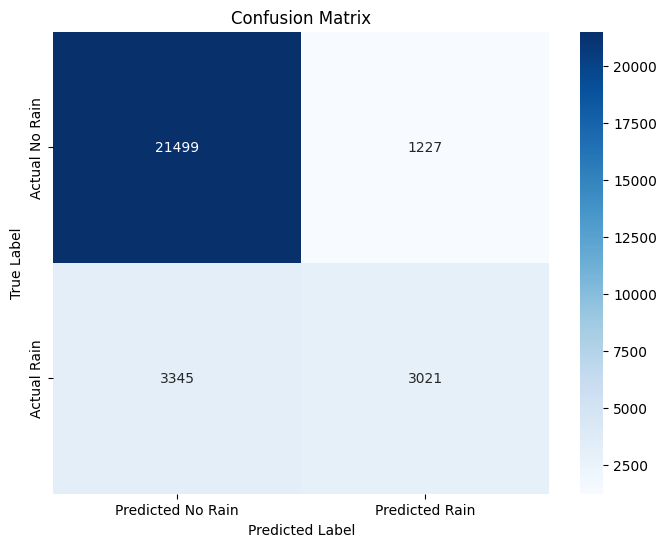

In [64]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.90     22726
        True       0.71      0.47      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [66]:
from sklearn.metrics import precision_score, recall_score

In [67]:
precision_score(y_test, y_pred)

0.7111581920903954

In [68]:
recall_score(y_test, y_pred)

0.47455230914231855

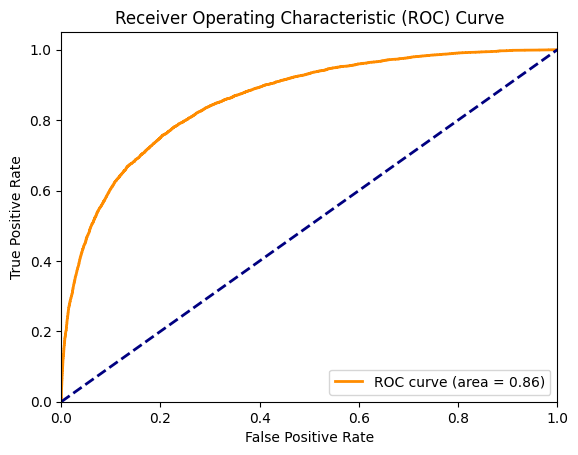

In [69]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = log_model.predict_proba(scaler_X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<hr>